# **Master in Data Science and Engineering**

## MECD 10 - Advanced Topics on Machine Learning    </small>  
**Professors:** Diogo Pernes and Luís Filipe Teixeira<br>

* Fabiana Rodrigues da Silva
* Gabriel Copolecchia Carvalhal
* Guilherme Carlos Salles

In [1]:
!pip install --quiet tensorflow-addons

     |████████████████████████████████| 1.1 MB 15.2 MB/s 


In [2]:
#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#packages
import os
import cv2
import seaborn as sns
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, roc_auc_score

from datetime import datetime
from glob import glob
%matplotlib inline

#keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
from keras_preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers.optimizer_experimental import optimizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

## Data Connection

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
##Import images from Drive

#!ls "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/"

#path_train = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/train/"

#path_test = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/test/"

#path_val  = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/val/"

path_train = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/train/"

path_test = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/test/"

path_val  = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/val/"

path_models = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/saved_models/"

## Dataset Pre-processing

Dataset pre-processing 1 channel

In [5]:
labels = ['NORMAL','PNEUMONIA']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_data(path_train)
test = get_data(path_test)
val = get_data(path_val)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [7]:
#Separate feature and label
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
 #With data augmentation to minimize overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train, seed=42)

Dataset pre-processing 3 channel

In [11]:
labels = ['NORMAL','PNEUMONIA']
img_size = 224
def get_training_data_color(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
train_3c = get_training_data_color(path_train)
test_3c = get_training_data_color(path_test)
val_3c = get_training_data_color(path_val)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [13]:
x_train_3c = []
y_train_3c = []

x_val_3c = []
y_val_3c = []

x_test_3c = []
y_test_3c = []

for feature, label in train_3c:
    x_train_3c.append(feature)
    y_train_3c.append(label)

for feature, label in test_3c:
    x_test_3c.append(feature)
    y_test_3c.append(label)
    
for feature, label in val_3c:
    x_val_3c.append(feature)
    y_val_3c.append(label)

In [14]:
# Normalize color data
x_train_3c = np.array(x_train_3c) / 255
x_val_3c = np.array(x_val_3c) / 255
x_test_3c = np.array(x_test_3c) / 255

In [15]:
#Data Augmentation
from numpy.random import shuffle
datagen_3c = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen_3c.fit(x_train_3c, seed=42)

## Models

In [16]:
# load model
model1 = load_model(path_models+'model1_best_model.hdf5')
resnet_model = load_model(path_models+'resnet_best_model.hdf5')
vgg16_model = load_model(path_models+'vgg16_best_model.hdf5')
vgg19_model = load_model(path_models+'vgg19_best_model.hdf5')


In [17]:
##Problem on load ViT
CLASSES = {'NORMAL': 0, 'PNEUMONIA': 1}  
BATCH_SIZE = 8

params = dict(
    seed = 42,
    image_dim = (224,224),
    weight_decay = 0.0001,
    epochs = 10,
    batch_size = 64,
    patch_size = 36, #36
    pool_size = (2,2),
    optimizer = 'Adam',
    l_rate = 0.001,
    val_split = .2,
    use_transfer_learning = False,
    use_data_aug = False,

    l2_reg = .0,
    projection_dim = 8,
    num_heads = 4,

    # Size of the transformer layers
    transformer_layers = 8,
    num_classes = len(CLASSES), 
    mlp_head_units = [2048,1024]
    )

new_params = dict(
    num_patches = (params['image_dim'][0] // params['patch_size']) ** 2,
    transformer_units = [
    params['projection_dim'] * 2,
    params['projection_dim']],
    input_shape = (params['image_dim'][0], params['image_dim'][1], 3),

)
params.update(new_params)

if params['use_data_aug']:
  data_aug_params = dict(
      da_rotation = 10,
      da_w_shift = 0.1,
      da_h_shift = 0.05,
      da_shear = 0.1,
      da_zoom = 0.15,
      da_h_flip = True,
      da_v_flip = False,
  )

In [18]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [19]:
dropout=0.1


def create_vit_classifier():
    #inputs = layers.Input(shape=params['input_shape'])
    inputs = layers.Input(shape=(224,224,1))
    # Augment data.
    #augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(params['patch_size'])(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(params['num_patches'], params['projection_dim'])(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(params['transformer_layers']):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=params['num_heads'], key_dim=params['projection_dim'], dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=params['transformer_units'], dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units=params['mlp_head_units'], dropout_rate=0.5)

    #Classify outputs
    #logits = layers.Dense(len(CLASSES),'sigmoid')(features)

    logits = keras.layers.Dense(1, 'sigmoid')(features)
    
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [20]:
#Model
vit_model = create_vit_classifier()
#callback
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

# #Save the best model (as a function of val_accuracy) on the way to training
checkpoint5 = ModelCheckpoint('vit_best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)
#Compile
vit_model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
vit_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 patches (Patches)              (None, None, 1296)   0           ['input_1[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 36, 8)        10664       ['patches[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 36, 8)       16          ['patch_encoder[0][0]']      

In [21]:
vit_history = vit_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 15 , validation_data = datagen.flow(x_test, y_test) ,callbacks = [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 35s 123ms/step - loss: 0.7361 - accuracy: 0.6998 - val_loss: 0.7301 - val_accuracy: 0.6266 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 19s 116ms/step - loss: 0.5323 - accuracy: 0.7373 - val_loss: 0.5400 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - 19s 118ms/step - loss: 0.4609 - accuracy: 0.7812 - val_loss: 0.4260 - val_accuracy: 0.8093 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 19s 116ms/step - loss: 0.4309 - accuracy: 0.8090 - val_loss: 0.4479 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 5/15
163/163 [==============================] - 19s 117ms/step - loss: 0.4058 - accuracy: 0.8225 - val_loss: 0.4998 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 6/15
163/163 [==============================] - 19s 118ms/step - loss: 0.3745 - accuracy: 0.8351 - val_loss: 0.4370 - val_accuracy: 0.8029 - lr: 0.0010
Epoch 7/15
163/163 [==============================] 

## Evaluation

### Model1

In [22]:
predictions = model1.predict(x_test)
predictions = predictions.reshape(1,-1)[0]

#y_pred
y_pred_m1 =  (predictions > 0.5).astype("int").reshape(624,)
y_label = y_test

20/20 [==============================] - 7s 29ms/step


In [23]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_label, y_pred_m1, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.87      0.87      0.87       234
   PNEUMONIA       0.92      0.92      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624



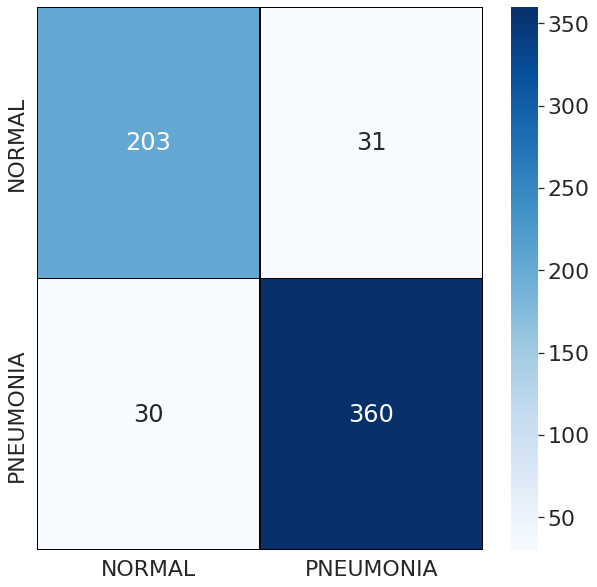

In [24]:
cm = confusion_matrix(y_label, y_pred_m1)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_m1)
fpr_m1, tpr_m1, thresholds2 = roc_curve(y_label, y_pred_m1)

In [26]:
f1_score_m1=  2 * ((precisions * recalls) / (precisions + recalls))
precision_m1 = precisions
recall_m1 = recalls

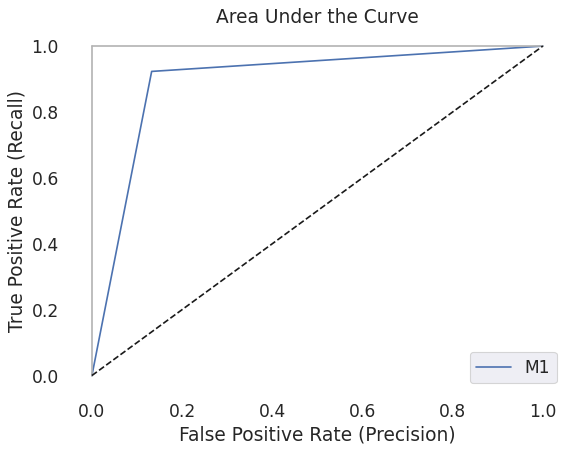

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_m1, tpr_m1)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['M1'], loc='best')
ax.set_facecolor("white")
plt.show()

In [28]:
correct = np.nonzero(y_test == y_pred_m1)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test != y_pred_m1)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  563
Incorrect Predicted:  61


In [29]:
print("Loss of the model is - " , model1.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model1.evaluate(x_test,y_test)[1]*100 , "%")
acc_m1 = model1.evaluate(x_test,y_test)[1]

20/20 [==============================] - 1s 20ms/step - loss: 0.6077 - accuracy: 0.9022
Loss of the model is -  0.6076834201812744
20/20 [==============================] - 0s 20ms/step - loss: 0.6077 - accuracy: 0.9022
Accuracy of the model is -  90.22436141967773 %
20/20 [==============================] - 0s 20ms/step - loss: 0.6077 - accuracy: 0.9022


### ResNet

In [30]:
predictions = resnet_model.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]

#y_pred
y_pred_resnet =  (predictions > 0.5).astype("int").reshape(624,)
y_label_3c = y_test_3c

20/20 [==============================] - 4s 110ms/step


In [31]:
print(classification_report(y_label_3c, y_pred_resnet, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.77      0.77      0.77       234
   PNEUMONIA       0.86      0.86      0.86       390

    accuracy                           0.83       624
   macro avg       0.82      0.82      0.82       624
weighted avg       0.83      0.83      0.83       624



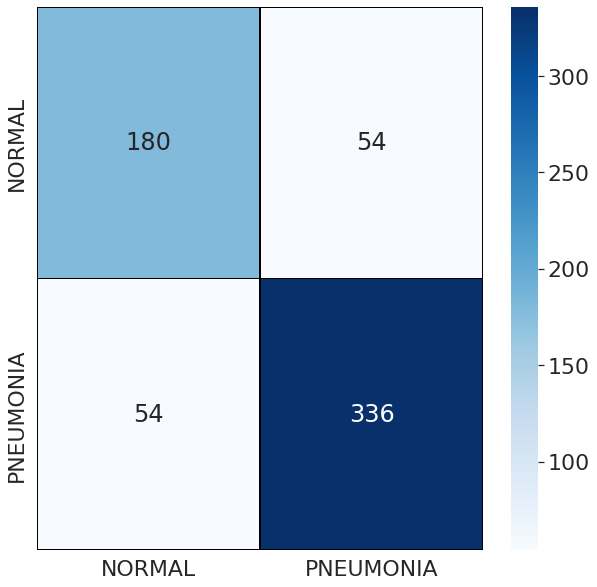

In [32]:
cm = confusion_matrix(y_test_3c, y_pred_resnet)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_label_3c, y_pred_resnet)
fpr_resnet, tpr_resnet, thresholds2 = roc_curve(y_test_3c, y_pred_resnet)

In [34]:
f1_score_resnet = 2 * ((precisions * recalls) / (precisions + recalls))
precision_resnet = precisions
recall_resnet = recalls

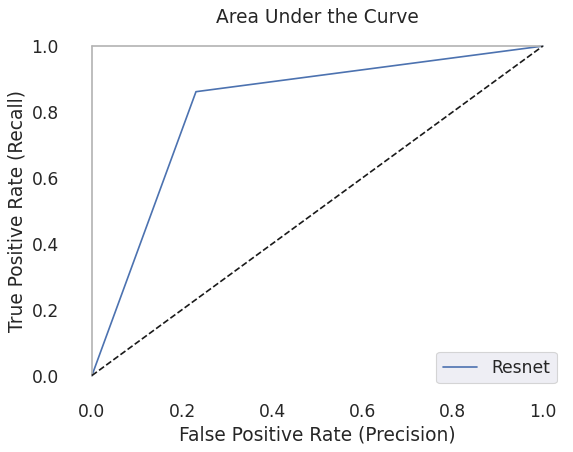

In [35]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_resnet, tpr_resnet)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['Resnet'], loc='best')
ax.set_facecolor("white")
plt.show()

In [36]:
correct = np.nonzero(y_test_3c == y_pred_resnet)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test_3c != y_pred_resnet)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  516
Incorrect Predicted:  108


In [37]:
print("Loss of the model is - " , resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_resnet = resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 7s 283ms/step - loss: 0.4440 - accuracy: 0.8045
Loss of the model is -  0.4439592957496643
20/20 [==============================] - 6s 274ms/step - loss: 0.4503 - accuracy: 0.8077
Accuracy of the model is -  80.7692289352417 %
20/20 [==============================] - 6s 286ms/step - loss: 0.4487 - accuracy: 0.8061


### VGG16

In [38]:
predictions = vgg16_model.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]

#y_pred
y_pred_vgg16 =  (predictions > 0.5).astype("int").reshape(624,)

20/20 [==============================] - 7s 219ms/step


In [39]:
print(classification_report(y_label_3c, y_pred_vgg16, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.90      0.89      0.89       234
   PNEUMONIA       0.93      0.94      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624



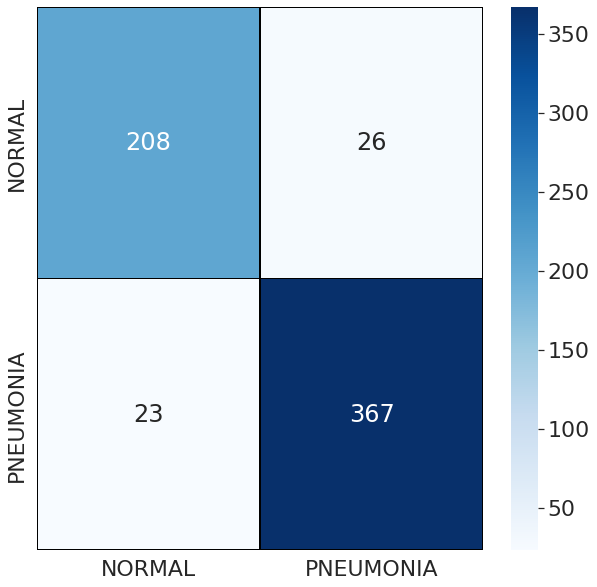

In [40]:
cm = confusion_matrix(y_label_3c, y_pred_vgg16)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_label_3c, y_pred_vgg16)
fpr_vgg16, tpr_vgg16, thresholds2 = roc_curve(y_label_3c, y_pred_vgg16)

f1_score_vgg16 = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vgg16 = precisions
recall_vgg16 = recalls

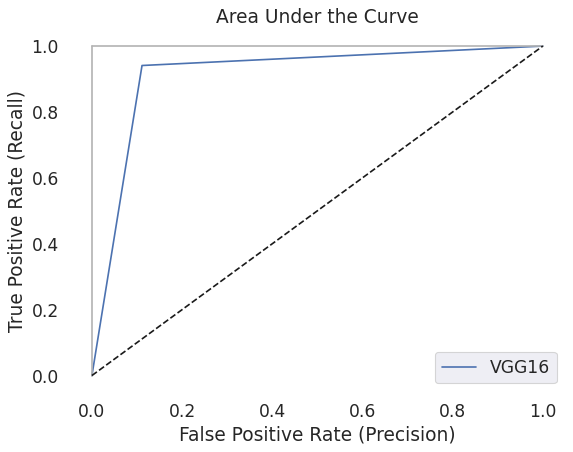

In [42]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_vgg16, tpr_vgg16)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VGG16'], loc='best')
ax.set_facecolor("white")
plt.show()

In [43]:
correct = np.nonzero(y_label_3c == y_pred_vgg16)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_label_3c != y_pred_vgg16)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  575
Incorrect Predicted:  49


In [44]:
print("Loss of the model is - " , vgg16_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , vgg16_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_vgg16 = vgg16_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 6s 291ms/step - loss: 0.2925 - accuracy: 0.8974
Loss of the model is -  0.2924717366695404
20/20 [==============================] - 6s 287ms/step - loss: 0.2534 - accuracy: 0.8958
Accuracy of the model is -  89.58333134651184 %
20/20 [==============================] - 6s 278ms/step - loss: 0.2505 - accuracy: 0.9103


### VGG19

In [45]:
predictions = vgg19_model.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]

#y_pred
y_pred_vgg19 =  (predictions > 0.5).astype("int").reshape(624,)

20/20 [==============================] - 3s 172ms/step


In [46]:
print(classification_report(y_label_3c, y_pred_vgg19, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.81      0.94      0.87       234
   PNEUMONIA       0.96      0.86      0.91       390

    accuracy                           0.89       624
   macro avg       0.88      0.90      0.89       624
weighted avg       0.90      0.89      0.89       624



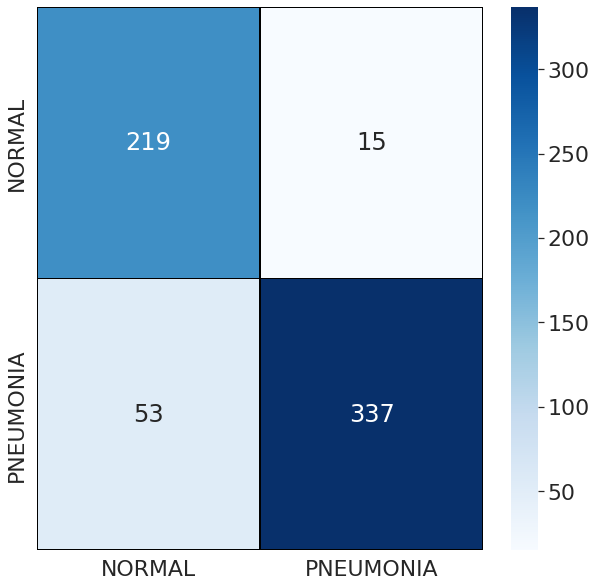

In [47]:
cm = confusion_matrix(y_label_3c, y_pred_vgg19)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_label_3c, y_pred_vgg19)
fpr_vgg19, tpr_vgg19, thresholds2 = roc_curve(y_label_3c, y_pred_vgg19)

f1_score_vgg19 = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vgg19 = precisions
recall_vgg19 = recalls

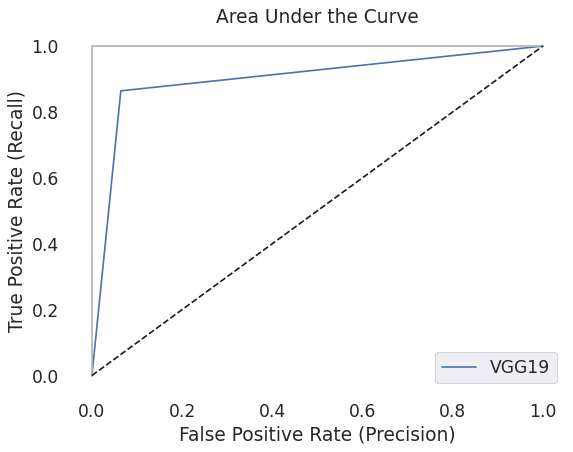

In [49]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_vgg19, tpr_vgg19)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VGG19'], loc='best')
ax.set_facecolor("white")
plt.show()

In [50]:
correct = np.nonzero(y_label_3c == y_pred_vgg16)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_label_3c != y_pred_vgg16)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  575
Incorrect Predicted:  49


In [51]:
print("Loss of the model is - " , vgg19_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , vgg19_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_vgg19 = vgg19_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 6s 290ms/step - loss: 0.2523 - accuracy: 0.9103
Loss of the model is -  0.2522788345813751
20/20 [==============================] - 6s 301ms/step - loss: 0.2672 - accuracy: 0.8910
Accuracy of the model is -  89.10256624221802 %
20/20 [==============================] - 6s 289ms/step - loss: 0.2690 - accuracy: 0.8878


### ViT

In [52]:
predictions = vit_model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]

y_pred_vit =  (predictions > 0.5).astype("int").reshape(624,)


20/20 [==============================] - 1s 13ms/step


In [53]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_label, y_pred_vit, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.72      0.85      0.78       234
   PNEUMONIA       0.90      0.80      0.85       390

    accuracy                           0.82       624
   macro avg       0.81      0.83      0.81       624
weighted avg       0.83      0.82      0.82       624



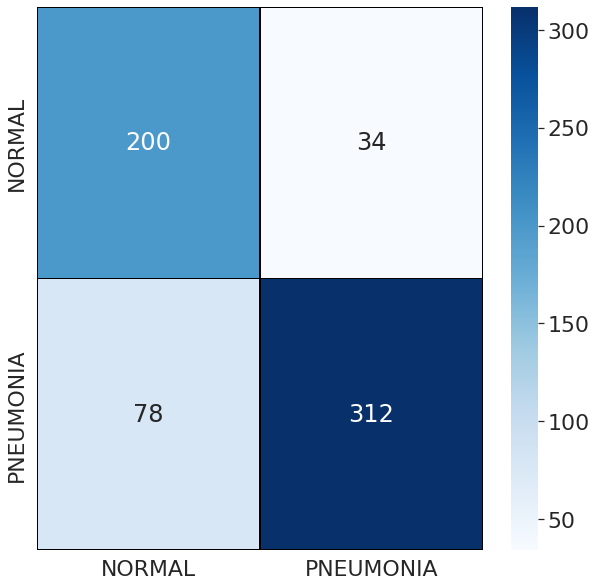

In [54]:
cm = confusion_matrix(y_label, y_pred_vit)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")
plt.show()

In [55]:
precisions, recalls, thresholds = precision_recall_curve(y_label, y_pred_vit)
fpr_vit, tpr_vit, thresholds2 = roc_curve(y_test, y_pred_vit)

f1_score_vit = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vit = precisions
recall_vit = recalls

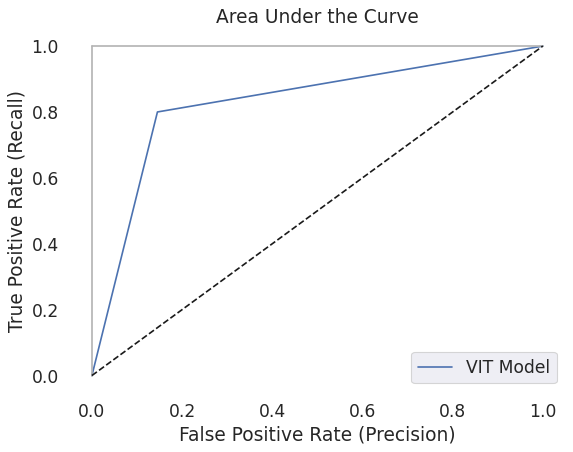

In [56]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_vit, tpr_vit)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VIT Model'], loc='best')
ax.set_facecolor("white")
plt.show()

In [57]:
correct = np.nonzero(y_label == y_pred_vit)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_label != y_pred_vit)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  512
Incorrect Predicted:  112


In [58]:
print("Loss of the model is - " , vit_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , vit_model.evaluate(x_test,y_test)[1]*100 , "%")
acc_vit = vit_model.evaluate(x_test,y_test)[1]

20/20 [==============================] - 0s 15ms/step - loss: 0.3767 - accuracy: 0.8205
Loss of the model is -  0.3767112195491791
20/20 [==============================] - 0s 15ms/step - loss: 0.3767 - accuracy: 0.8205
Accuracy of the model is -  82.05128312110901 %
20/20 [==============================] - 0s 14ms/step - loss: 0.3767 - accuracy: 0.8205


## Emsemble Strategy - Top 3 Best Models

In [60]:
dat1 = pd.DataFrame({'M1': y_pred_m1})
dat2 = pd.DataFrame({'Model VGG16': y_pred_vgg16})
dat3 = pd.DataFrame({'Model VGG19': y_pred_vgg19})

df_voting = dat1.join(dat2)
df_voting = df_voting.join(dat3)

In [61]:
def voting(v1,v2,v3):
    avg = v1+v2+v3/3
    if avg > 0.5:
        result=1
    else:
        result=0
    return result

df_voting['Voting'] = df_voting.apply(lambda row: voting(row['M1'], row['Model VGG16'], row['Model VGG19']), axis=1)

In [62]:
y_pred_voting = df_voting['Voting'].to_numpy()

In [63]:
df_voting.tail(10)

,M1,Model VGG16,Model VGG19,Voting
614,1,1,1,1
615,1,1,1,1
616,1,1,1,1
617,1,1,1,1
618,1,1,1,1
619,1,1,1,1
620,1,1,1,1
621,1,1,1,1
622,0,1,1,1
623,1,1,0,1


In [64]:
print(classification_report(y_label, y_pred_voting, target_names = ['Normal (Class 0)','Pnenomia (Class 1)']))

                    precision    recall  f1-score   support

  Normal (Class 0)       0.93      0.85      0.89       234
Pnenomia (Class 1)       0.92      0.96      0.94       390

          accuracy                           0.92       624
         macro avg       0.92      0.91      0.91       624
      weighted avg       0.92      0.92      0.92       624



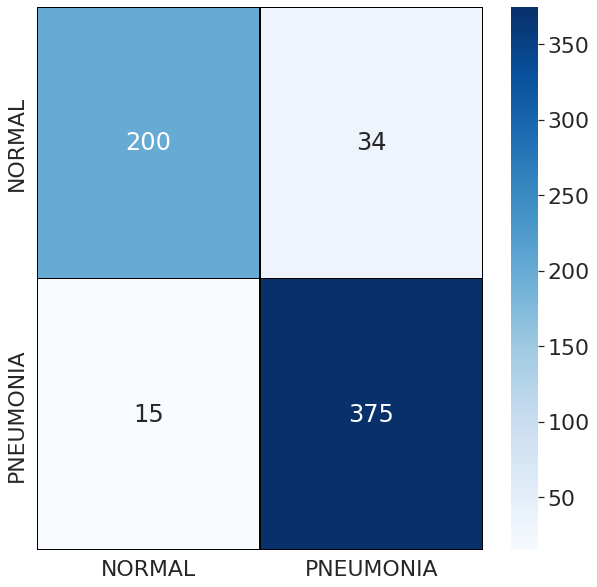

In [70]:
cm = confusion_matrix(y_label, y_pred_voting)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")
plt.show()

In [71]:
correct = np.nonzero(y_label == y_pred_voting)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_label != y_pred_voting)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  575
Incorrect Predicted:  49


In [72]:
precisions, recalls, thresholds = precision_recall_curve(y_label, y_pred_voting)

acc_ens= len(correct)/(len(correct)+len(incorrect))
f1_score_ens = 2 * ((precisions * recalls) / (precisions + recalls))
precision_ens= precisions
recall_ens = recalls

## Results

ROC Curve

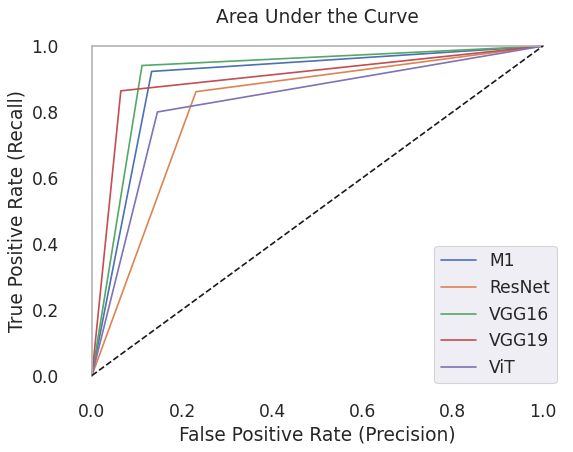

In [65]:
from sklearn.metrics import roc_curve, auc


fpr_top3, tpr_top3, thresholds2 = roc_curve(y_test, y_pred_voting)

sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_m1,tpr_m1,label ='M1')
plt.plot(fpr_resnet,tpr_resnet,label='ResNet')
plt.plot(fpr_vgg16,tpr_vgg16,label ='VGG16')
plt.plot(fpr_vgg19,tpr_vgg19,label='VGG19')
plt.plot(fpr_vit,tpr_vit,label ='ViT')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
ax.set_facecolor("white")
plt.show()

Results Table

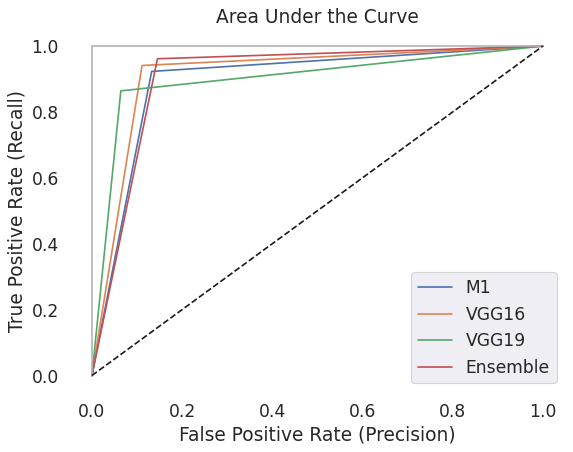

In [77]:
from sklearn.metrics import roc_curve, auc


fpr_top3, tpr_top3, thresholds2 = roc_curve(y_test, y_pred_voting)

sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr_m1,tpr_m1,label ='M1')
plt.plot(fpr_vgg16,tpr_vgg16,label ='VGG16')
plt.plot(fpr_vgg19,tpr_vgg19,label='VGG19')
plt.plot(fpr_top3,tpr_top3,label='Ensemble')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
ax.set_facecolor("white")
plt.show()

In [73]:
results = pd.DataFrame(columns=['Model','Precision','Accuracy','F1_score','Recall'])

row_model_1 = pd.Series(['Model 1',precision_m1[1],acc_m1,f1_score_m1[1],recall_m1[1]], index=results.columns)
row_model_2 = pd.Series(['Model ResNet',precision_resnet[1],acc_resnet,f1_score_resnet[1],recall_resnet[1]], index=results.columns)
row_model_3 = pd.Series(['Model VGG16',precision_vgg16[1],acc_vgg16,f1_score_vgg16[1],recall_vgg16[1]], index=results.columns)
row_model_4 = pd.Series(['Model VGG19',precision_vgg19[1],acc_vgg19,f1_score_vgg19[1],recall_vgg19[1]], index=results.columns)
row_model_5 = pd.Series(['Model ViT',precision_vit[1],acc_vit,f1_score_vit[1] ,recall_vit[1]], index=results.columns)
row_model_6 = pd.Series(['Ensemble',precision_ens[1],acc_ens,f1_score_ens[1] ,recall_ens[1]], index=results.columns)

In [74]:
results = results.append(row_model_1,ignore_index=True)
results = results.append(row_model_2,ignore_index=True)
results = results.append(row_model_3,ignore_index=True)
results = results.append(row_model_4,ignore_index=True)
results = results.append(row_model_5,ignore_index=True)
results = results.append(row_model_6,ignore_index=True)

In [76]:
results.head(6)

,Model,Precision,Accuracy,F1_score,Recall
0,Model 1,0.920716,0.902244,0.921895,0.923077
1,Model ResNet,0.861538,0.806090,0.861538,0.861538
2,Model VGG16,0.933842,0.910256,0.937420,0.941026
3,Model VGG19,0.957386,0.887821,0.908356,0.864103
4,Model ViT,0.901734,0.820513,0.847826,0.800000
5,Ensemble,0.916870,0.921474,0.938673,0.961538


# References

https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy

https://www.kaggle.com/code/raufmomin/vision-transformer-vit-from-scratch

https://www.kaggle.com/code/mattiasstahre/vit-binary/notebook

https://www.kaggle.com/code/abhinand05/vision-transformer-vit-tutorial-baseline

https://www.kaggle.com/code/paultimothymooney/detecting-pneumonia-in-x-ray-images